In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
from sklearn.datasets import load_boston 

# Data Structure
First, we take a quick look the data structure, summary statistics, and info to notice any abnormalities. There is no null values or categorical variables so preperation will be eaiser than in the California dataset.

In [2]:
df = load_boston()
print(df.data.shape)

(506, 13)


In [3]:
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [4]:
boston['MEDV'] = df.target
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [5]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


# Histogram/Correlation Matrix
We notice a few things from the histograms:
* 'CRIM', 'ZN', 'DIS' have capped values. If this project was tasked with finding a precise prediciton, I would need new uncapped feautures or I would need to remove them from the final prediciton. 
* A few features are tail heavy: 'CRIM', 'ZN', 'CHAS', 'NOX'. We can transform these fetaures to have a bell-shaped distribution if ML algorithms are high in error. 
* Correlation matrix shows wide variety of correlations between variables. Feature selection will be a vital step in training.

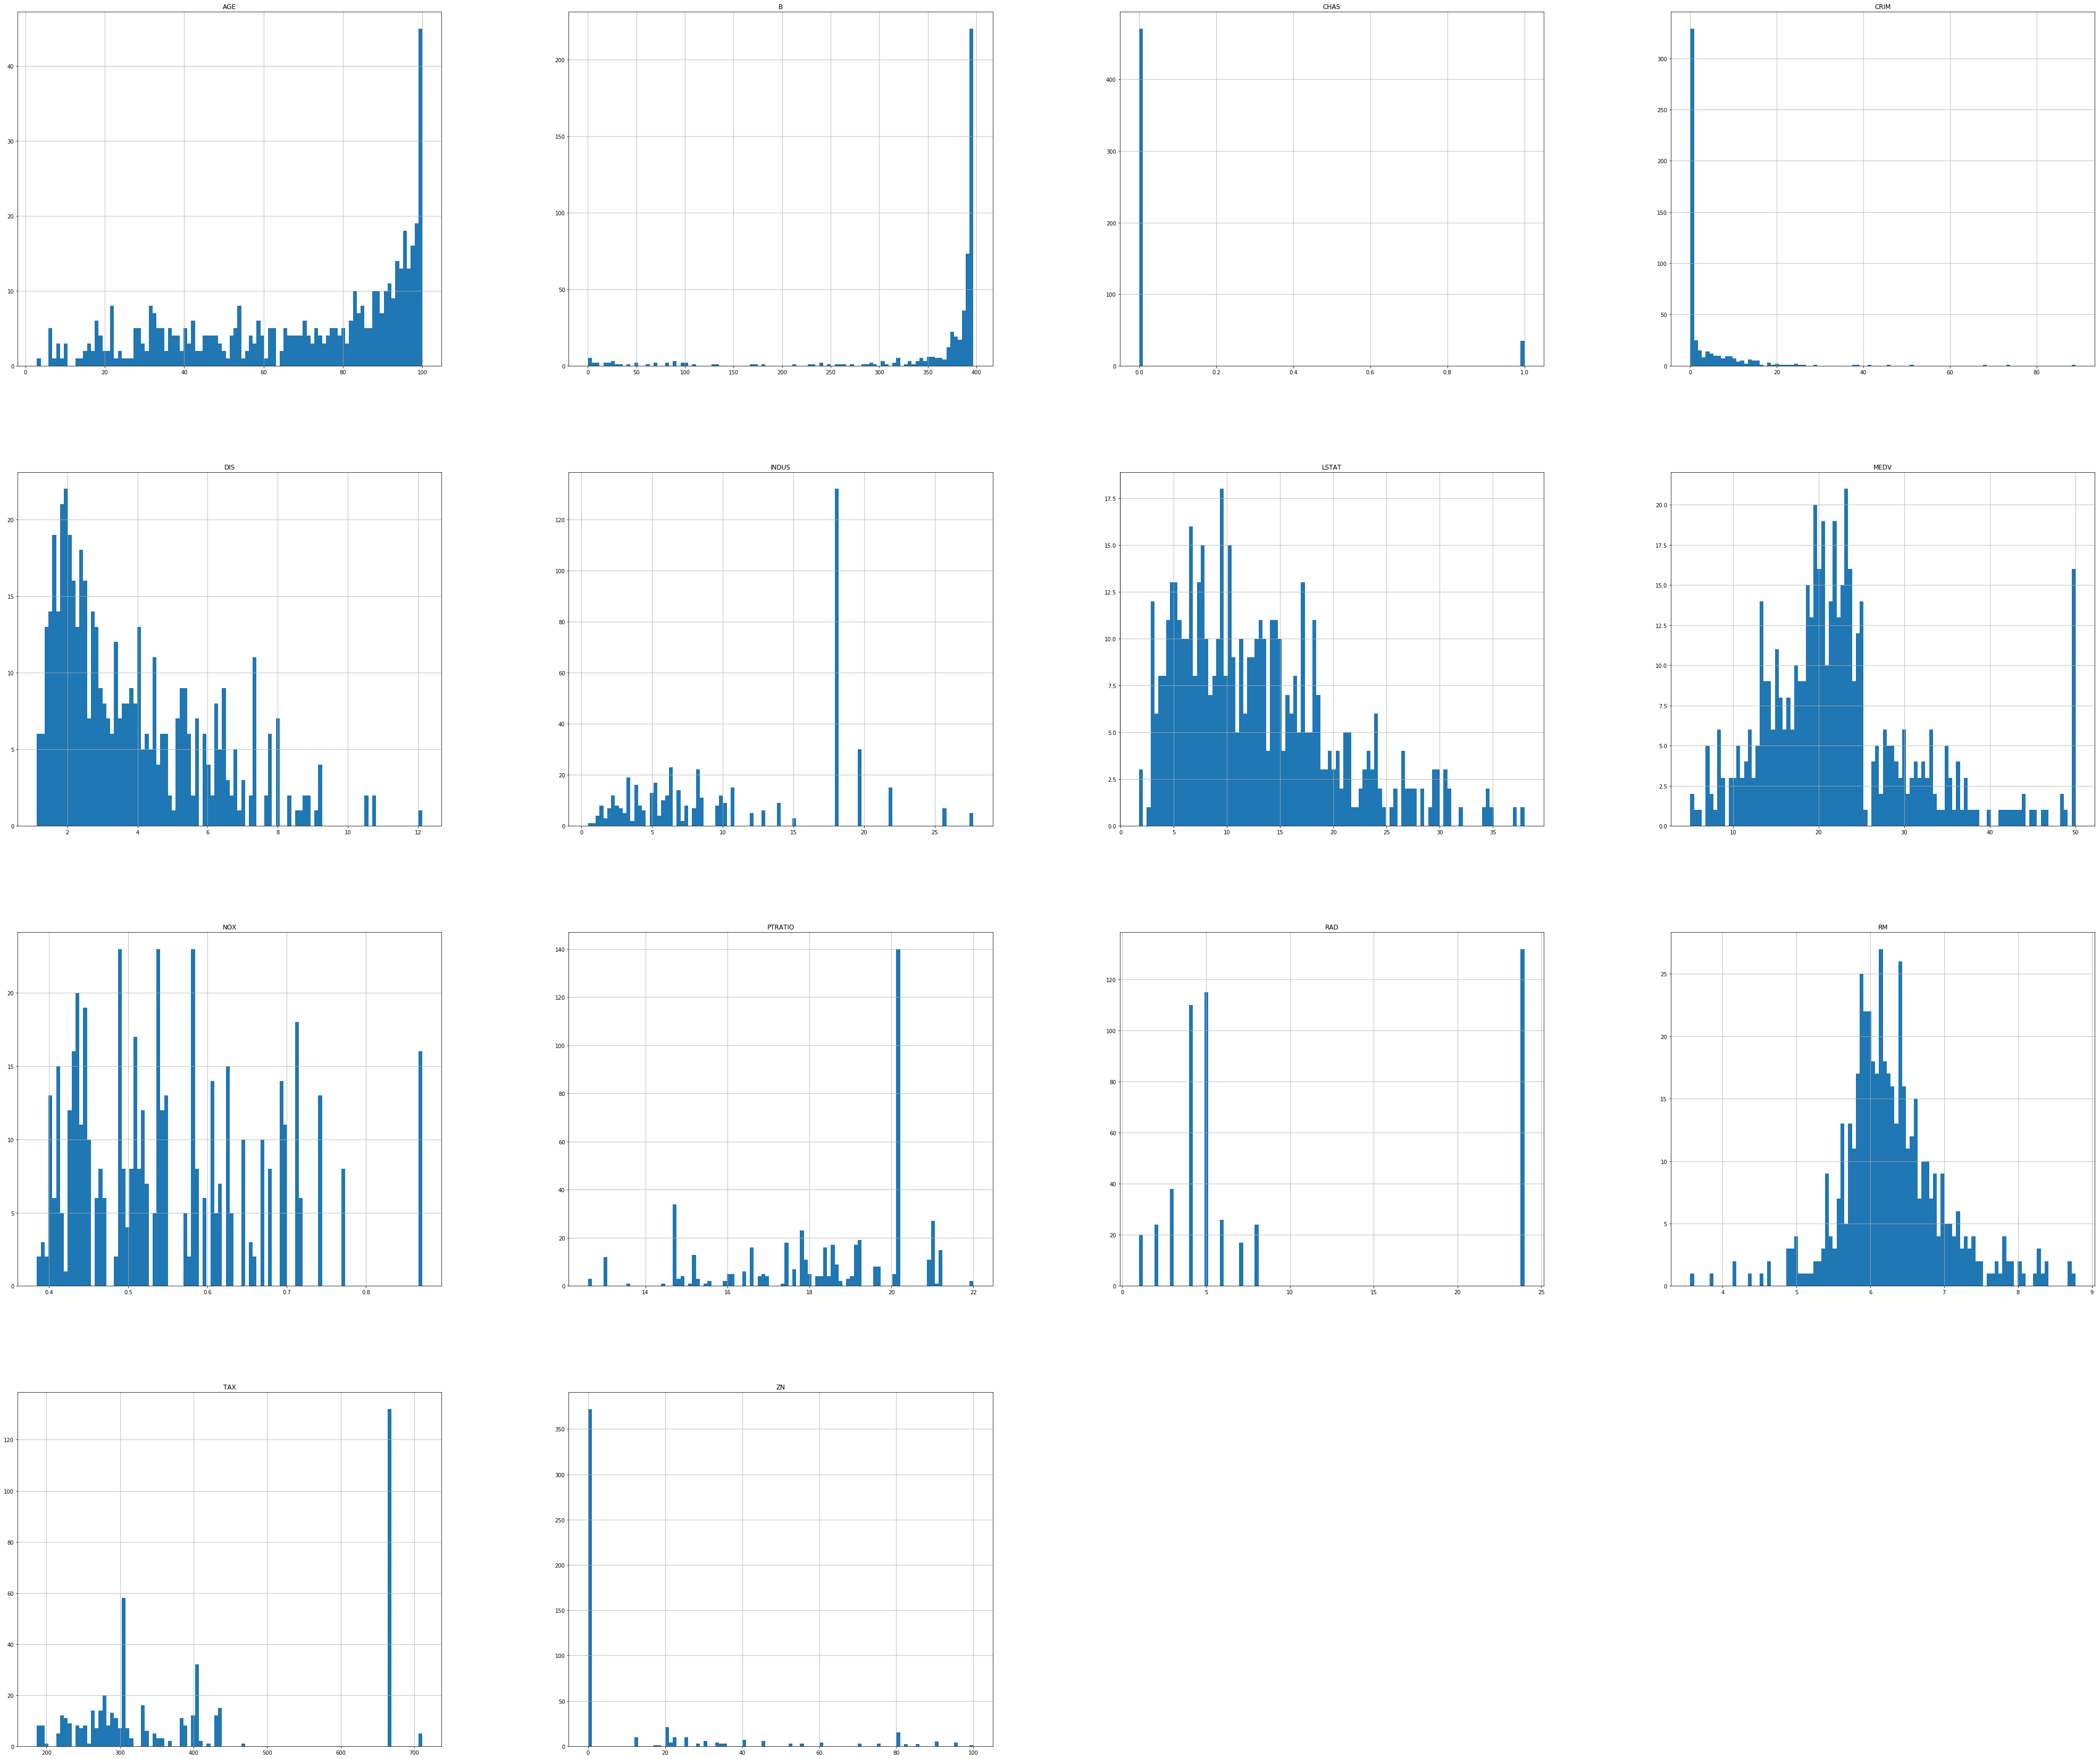

In [6]:
boston.hist(bins=100, figsize=(70,60))
plt.show()

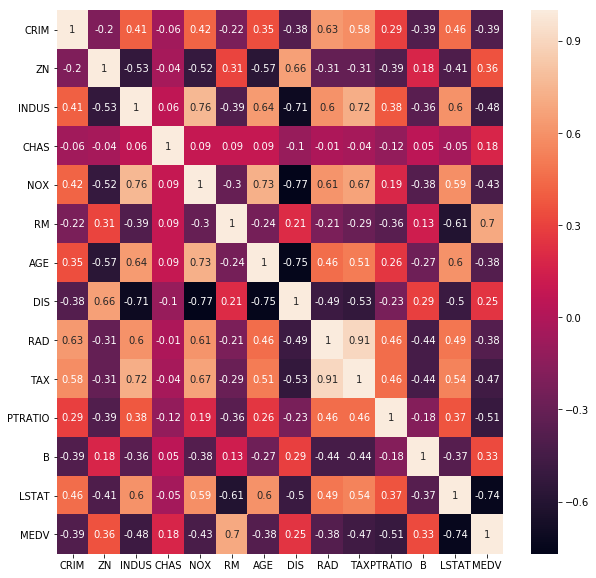

In [7]:
correlation_matrix = boston.corr().round(2)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data= correlation_matrix, annot=True)

# Train/Test Split
Test size is 20% with random_state=42 to keep the same splits in case I rerun the notebook. I also created a train set copy so that I do not change or affect the set in any way.

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(boston, test_size=0.2, random_state=42)
print(len(train_set), "train ,", len(test_set), "test")

404 train , 102 test


# Model/Performance Measure Selection
* I use root mean squared error as my performance metric as it is a typical performance measure for regression problems.
* I will test three different models
    * Linear Regression
    * Decision Tree Regressor
    * Random Forest Regressor

In [9]:
boston1 = train_set.copy()
from sklearn.linear_model import LinearRegression
X = boston1[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
            'B', 'LSTAT']]
Y = boston1['MEDV']
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
from sklearn.metrics import mean_squared_error
prediction = lin_reg.predict(X)
lin_mse = mean_squared_error(Y, prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

4.6520331848801675

In [11]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

We can the RMSE for the Decision Tree to be 0. Obviously this means the model is overfitting so we can use Cross-Validation to better evaluate the models. 

In [12]:
prediction1 = tree_reg.predict(X)
tree_mse = mean_squared_error(Y, prediction1)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X, Y, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())
display_scores(tree_rmse_scores)

Scores: [3.93836663 4.38314399 4.93884553 6.74659806 7.91234794 3.66854876
 5.08954811 4.93208881 4.09365362 5.39724467]
Mean: 5.110038611827216
Standard deviation: 1.2524882143550908


In [14]:
lin_scores = cross_val_score(lin_reg, X, Y, scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [3.76298481 4.25110998 5.34719644 6.71464778 4.59265163 5.17395941
 4.43145447 4.5777583  3.6723473  5.77030866]
Mean: 4.829441880454267
Standard deviation: 0.8896329730748647


In [15]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X,Y)
prediction2 = forest_reg.predict(X)
forest_mse = mean_squared_error(Y, prediction2)
forest_rmse = np.sqrt(forest_mse)
forest_rmse
scores = cross_val_score(forest_reg, X, Y, scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [2.80771846 3.65593604 2.41604292 5.21288062 5.82515386 3.32953976
 4.56025301 2.75586012 2.51903603 5.11599624]
Mean: 3.8198417048743494
Standard deviation: 1.1948438191419168


# Fine-Tuning Model
We can see that the Random Forest Regressor has the lowest mean RMSE. Now we fine-tune this model.
Grid Search allows the ability to change around the parameters. I set a range for n-estimators from 400-600 with increments of 50 and a max features range of 2-7. Below we see that the best combination is 6 features and 600 n-estimators. 

In [16]:
from sklearn.model_selection import GridSearchCV
grid_param = {  
    'n_estimators': [400, 450, 500, 550, 600],
    'max_features': [2,3,4,5,6,7]
}
gd_sr = GridSearchCV(estimator=forest_reg,  
                     param_grid=grid_param,
                     scoring='neg_mean_squared_error',
                     cv=5,refit=True)
gd_sr.fit(X,Y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [400, 450, 500, 550, 600], 'max_features': [2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [17]:
gd_sr.best_params_

{'max_features': 6, 'n_estimators': 600}

# Evaluating Model on the Test Set
With a final model fine-tuned, we test the final RMSE which has lowered from 3.82 to 2.93. Now the model is in a better position to predict. 

In [18]:
final_model = gd_sr.best_estimator_

In [19]:
feature_importance = gd_sr.best_estimator_.feature_importances_
feature_importance

array([0.05273881, 0.00247915, 0.04415168, 0.00469038, 0.05122592,
       0.35856488, 0.02081316, 0.05353233, 0.00640459, 0.02145952,
       0.04670989, 0.01659862, 0.32063107])

In [20]:
X_test = test_set.drop("MEDV", axis=1)
Y_test = test_set["MEDV"].copy()
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.935442643975105